In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Y dataset')

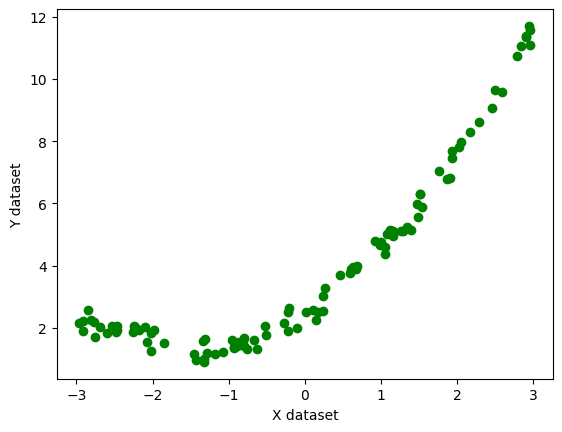

In [6]:
## making dataset with outliers
X = 6 * np.random.rand(100,1) - 3
y =  0.5 * X**2 + 1.5*X+2 + np.random.rand(100,1)
# random no. are added for outliers
plt.scatter(X,y,color='g')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')


In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
## Implement Simple linear regg
from sklearn.linear_model import LinearRegression
regressor_1=LinearRegression()

In [12]:
regressor_1.fit(X_train,y_train)

LinearRegression()

In [13]:
from sklearn.metrics import r2_score
score=r2_score(y_test,regressor_1.predict(X_test))
print(score)

0.7194238550322971


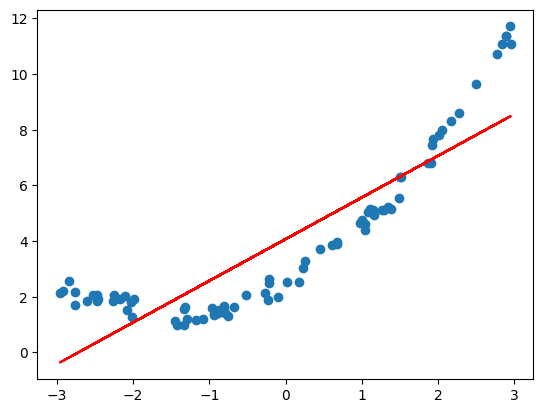

In [14]:
# Visualizing the simple linear regg
plt.plot(X_train,regressor_1.predict(X_train),'r')
plt.scatter(X_train,y_train)

# Applying Polynomial transformation


In [26]:
from sklearn.preprocessing import PolynomialFeatures


In [25]:
poly=PolynomialFeatures(degree=2,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [17]:
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train_poly,y_train)
y_pred=regressor.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9898364558604248


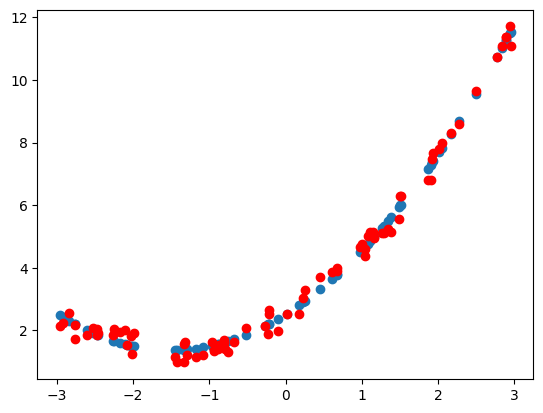

In [24]:
plt.scatter(X_train,regressor.predict(X_train_poly))
plt.scatter(X_train,y_train,color='r')

In [27]:
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(X_train)
X_test_poly=poly.transform(X_test)

In [28]:
from sklearn.metrics import r2_score
regressor = LinearRegression()
regressor.fit(X_train_poly,y_train)
y_pred=regressor.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.9898475170913268


In [29]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

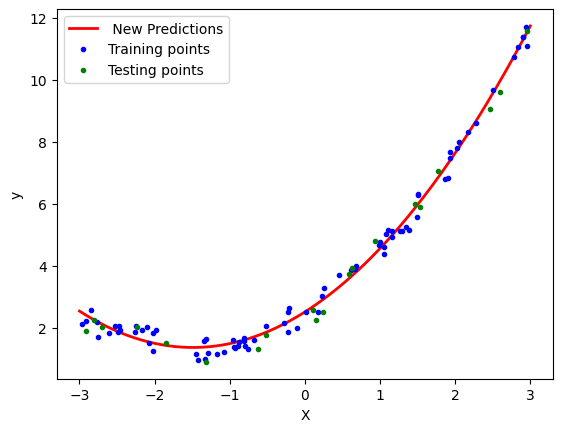

In [31]:
y_new = regressor.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Pipeline Concept

In [32]:
from sklearn.pipeline import Pipeline

In [33]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(X_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

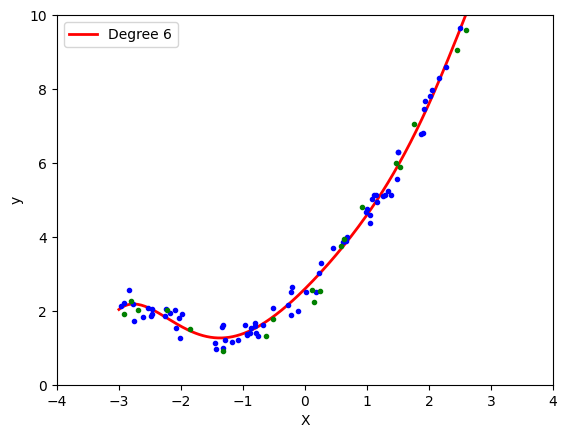

In [34]:
poly_regression(6)